# <center> Machine Learning Classification

## MNIST Dataset Machine Learning Binary Classification
Jupyter notebook is very popular for Machine Learning Project. Below, we will show how data scientis can conduct Machine Learning project in Jupyter notebook. The followings are the typical steps of Machine Learning project.  This project will follow the below steps to find the best models for the problems.  
1. [Obtain the data](#1.-Obtain-the-data)
2. [Review and visualize the data](#2.-Review-and-Visualize-the-data)
3. [Preprocess the data](#3.-Preprocess-the-data)
4. [Prepare train and test data](#4.-Prepare-train-and-test-data)
5. [Pick the algorithm](#5.-Pick-the-algorithm)
6. [Train the model](#6.-Train-the-model)
7. [Predict with the trained model](#7.-Predict-with-the-trained-model)

The data scientist can prepare test and train data.  And, the data scientist will pick the the alrgorithm and train the model with the trained data.  Here, we pick the simple SGDClassifier, but the data scientist can pick other model like Support Vector Machine, Deep Neural Network and Convolutional Neural Network. 

In [1]:
## Show plotting in Jupyter notebook
%matplotlib inline 

### 1. Obtain the data
The data is image data from 0 to 9 from MNST dataset. 
The data scientis obtains the data from Machine Learning Training data: sklearn.datasets. Using the data, the data scientist will find the best model to predit the image. 

In [2]:
### import MNST datasets using sklearn API
from sklearn.datasets import fetch_mldata

### 2. Review and Visualize the data

In [3]:
mnist = fetch_mldata('MNIST original')
print('Review of Data')
print(mnist)

Review of Data
{'DESCR': 'mldata.org dataset: mnist-original', 'COL_NAMES': ['label', 'data'], 'target': array([0., 0., 0., ..., 9., 9., 9.]), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


### 3. Preprocess the data

Shape of X data:  (70000, 784)
Shape of y data:  (70000,)
Sample X data (image) is


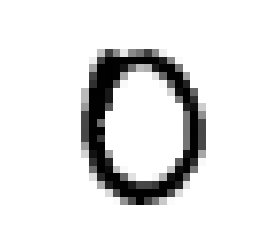

Sample y data is 0.0


In [4]:
### prepare X and Y dataset
X, y = mnist["data"], mnist["target"]
print('Shape of X data: ', X.shape)
print('Shape of y data: ', y.shape)

### Pick one image and reshape to 28 by 28 for image
digit_image1 = X[1200].reshape(28, 28)
print('Sample X data (image) is')

### Import matplotlib for data visualization
import matplotlib
import matplotlib.pyplot as plt

### Show that image
plt.imshow(digit_image1, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off") ## remove the outside frame
plt.show() # show plot

print("Sample y data is", y[1200])

### 4. Prepare train and test data

In [5]:
### Prepare test and train data
from sklearn.model_selection import train_test_split ## split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  ## test is 20% and train is 80%.

### 5. Pick the algorithm
Here, the data scientist picks up linear Classifier with SGD training. 

In [6]:
### import the algorithm
from sklearn.linear_model import SGDClassifier

### 6. Train the model

In [7]:
### Train the model
sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

The data scientis can validate the accuracy of the trained model.  Here is the average of accuracy is aboutt 87%, which is not that bad. More advanced model like CNN can provide better accuracy. 

In [8]:
### Validate the accuracy
from sklearn.model_selection import cross_val_score
print('Accuracy of Training data : ', cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy"))  ### With train data 
print('Accuracy of Test data:', cross_val_score(sgd_clf, X_test, y_test, cv=3, scoring="accuracy"))  ### With test data

Accuracy of Training data :  [0.87686127 0.87126326 0.84735319]
Accuracy of Test data: [0.85628614 0.88303342 0.85545786]


### 7. Predict with the trained model
With the trained model, the data scientist can predit the result of the test data.

In [9]:
print('predicted y value: ', sgd_clf.predict([X_test[111]]))
print('actual y value: ', y_test[111])

predicted y value:  [7.]
actual y value:  7.0


## The same algorithm, but different hyperparameters
Change hyperparameters by normalizing input data

In [10]:
### Prepare test and train data
X2 = X/255  # normalizing data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

### import the algorithm
from sklearn.linear_model import SGDClassifier

### Train the model
sgd_clf2 = SGDClassifier(max_iter=5, random_state=42)
sgd_clf2.fit(X2_train, y2_train)

### Validate the accuracy
print('Accuracy of Normalized Training data : ', cross_val_score(sgd_clf2, X2_train, y2_train, cv=3, scoring="accuracy"))  ### With train data 
print('Accuracy of Normalized Test data : ', cross_val_score(sgd_clf2, X2_test, y2_test, cv=3, scoring="accuracy"))  ### With test data

Accuracy of Normalized Training data :  [0.87986074 0.89071038 0.87124946]
Accuracy of Normalized Test data :  [0.87063611 0.87296487 0.85717349]
